In [1]:
from dypac import Dypac
from dypac.bascpp import stab_maps
import numpy as np
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from dypac_utils import load_dypac, load_r2_intra, load_r2_inter, load_r2_other, mean_r2, mean_inter_r2

# Model

In [9]:
subject = 'sub-01'
fwhm = '5'
cluster = 300
state = 900
root_data = '/data/cisl/pbellec/cneuromod_embeddings/xp_202012/'
model, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)

# intra subject

## Training set - interactive viewer 


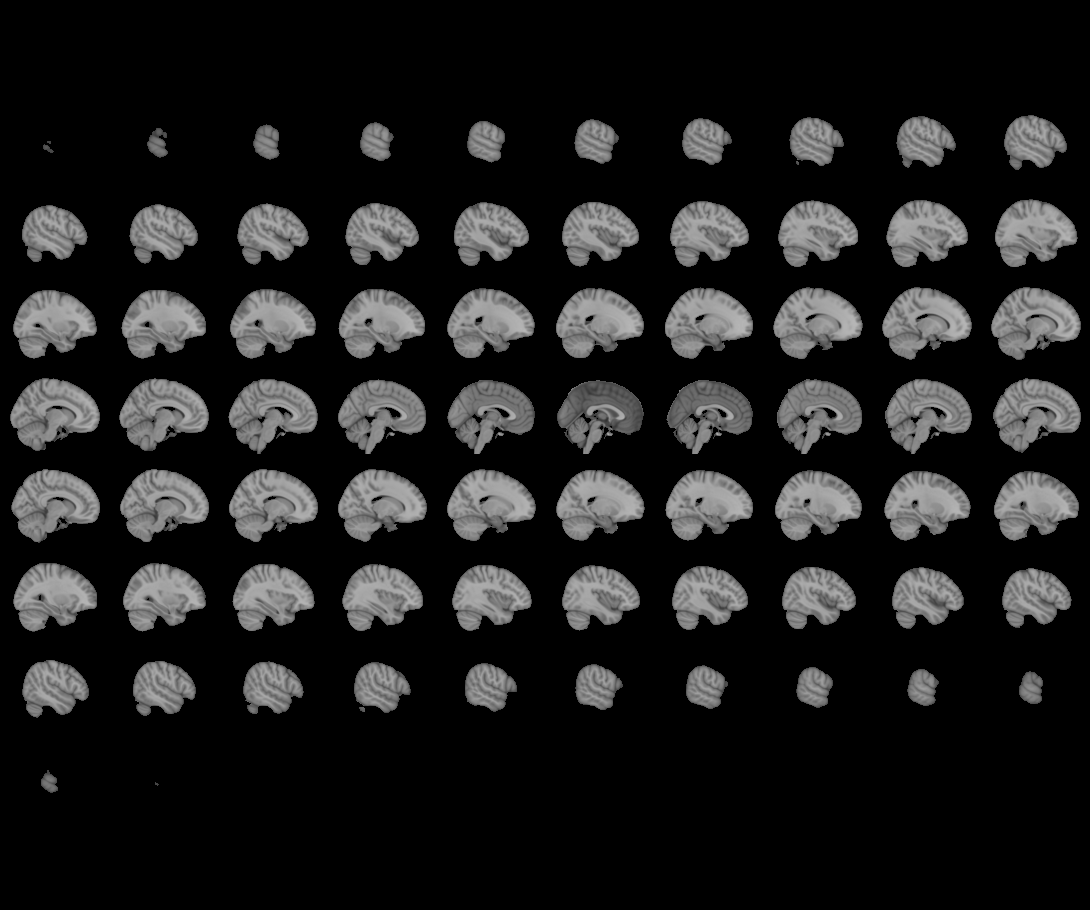
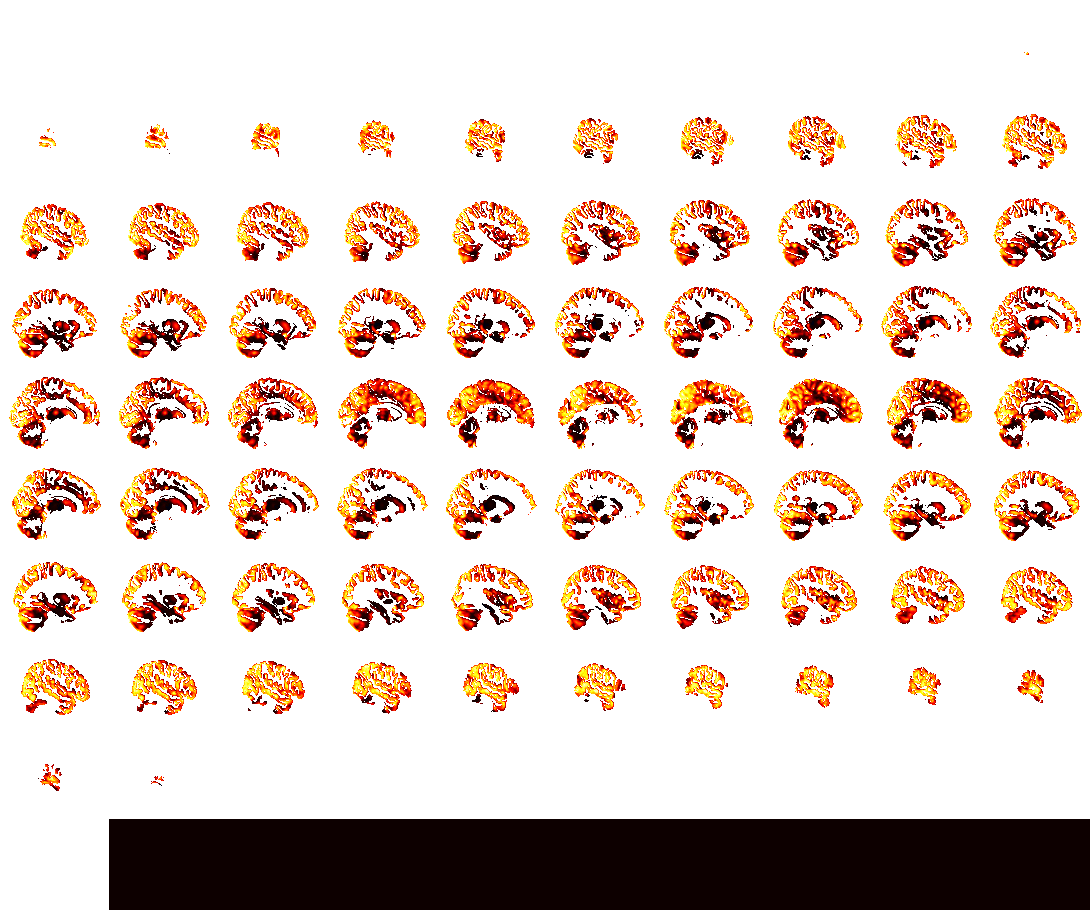

In [15]:
hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_training = mean_r2(hdf5_file['training'], ref_img=mask_img)
plotting.view_img(r2_training, threshold=0, vmax=1)


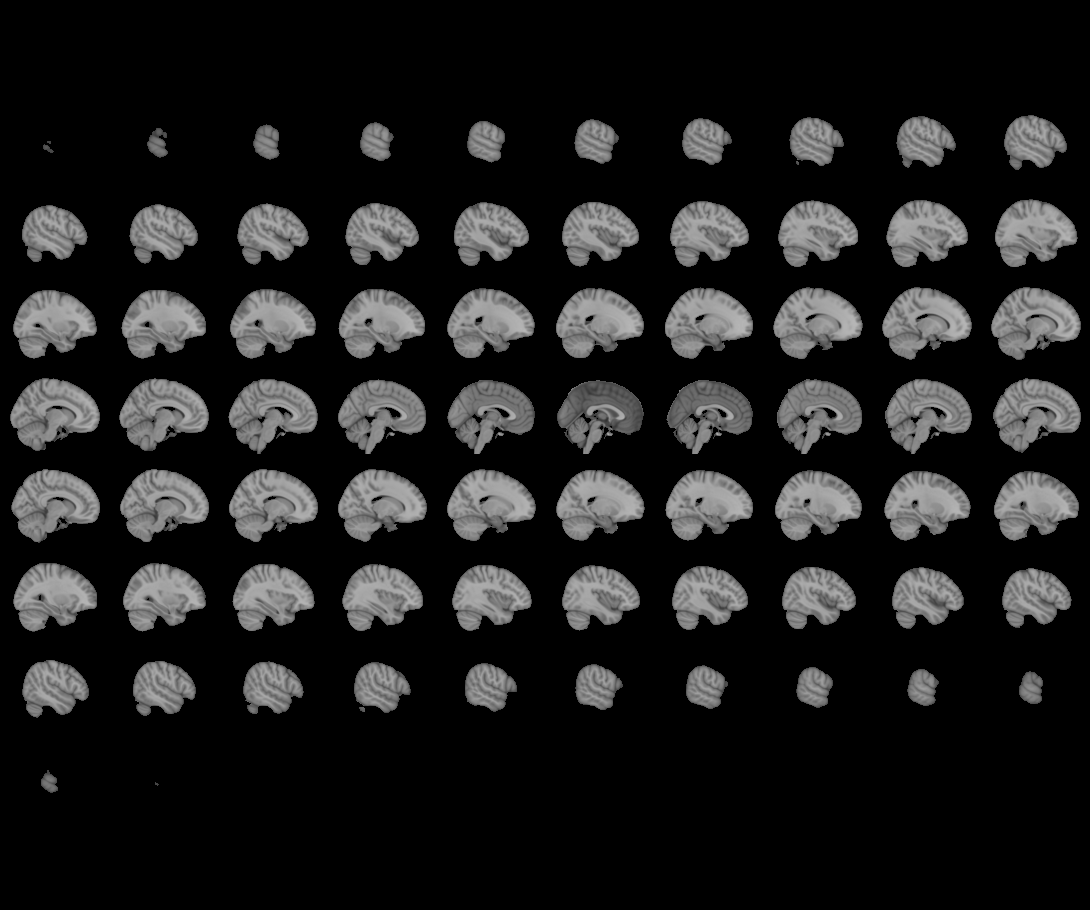
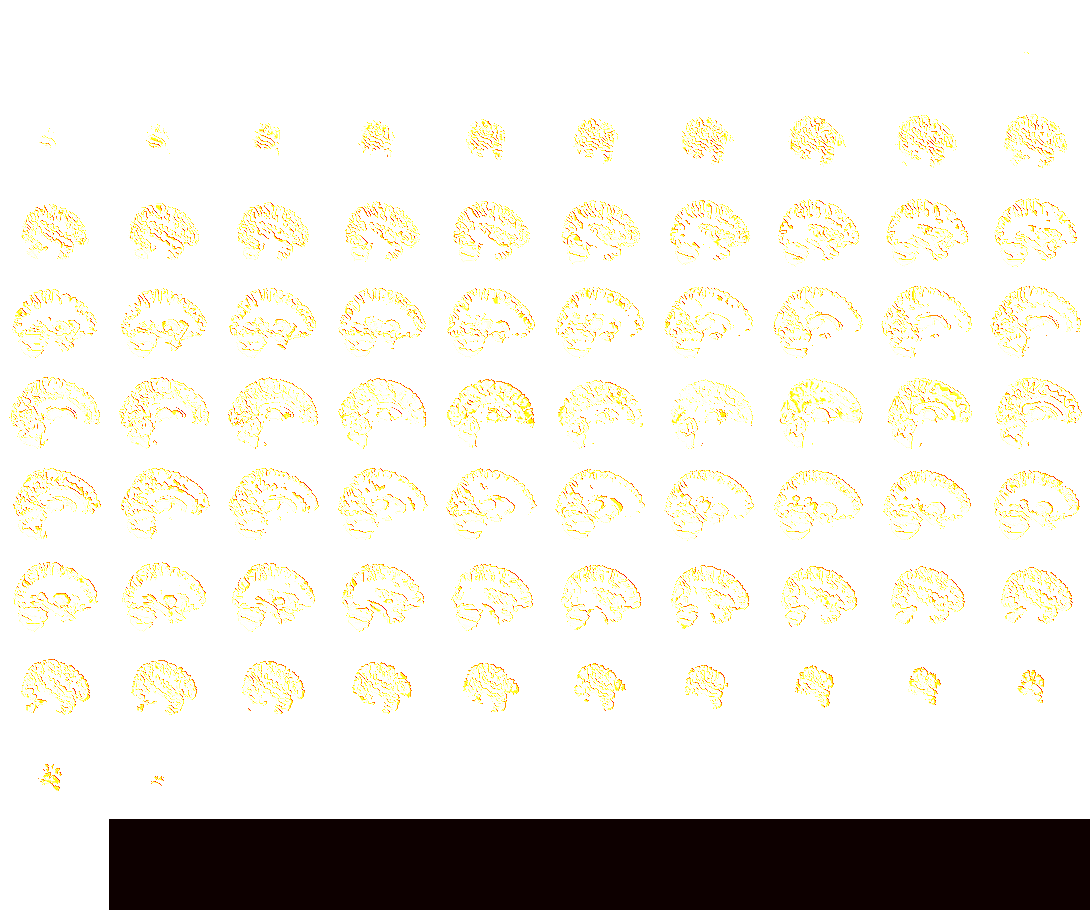

In [14]:
plotting.view_img(mask_img)

In [11]:
mask = mask_img.get_fdata()
val = r2_training.get_fdata()

In [16]:
np.median(val[mask>0])

0.43035281113783164

(array([1.0000e+01, 1.2701e+04, 1.3810e+04, 1.3658e+04, 1.5625e+04,
        1.7643e+04, 1.9323e+04, 1.8791e+04, 1.2474e+04, 2.6020e+03]),
 array([-0.16444789, -0.05517613,  0.05409563,  0.16336738,  0.27263914,
         0.3819109 ,  0.49118265,  0.60045441,  0.70972617,  0.81899792,
         0.92826968]),
 <BarContainer object of 10 artists>)

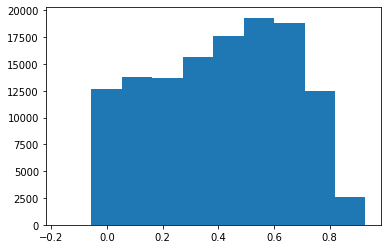

In [13]:
plt.hist(val[mask>0])

## Training set - static viewer (all subjects)

sub-01
sub-02
sub-03
sub-04
sub-05
sub-06


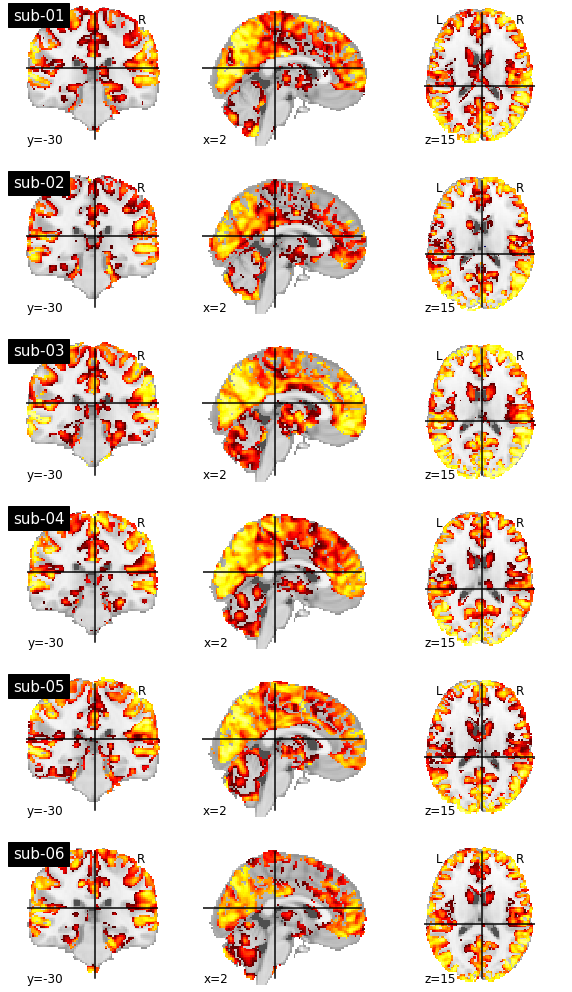

In [4]:
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
    r2_training = mean_r2(hdf5_file['training'], ref_img=mask_img)
    plotting.plot_stat_map(r2_training, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, colorbar=False)

## Validation set - interactive viewer


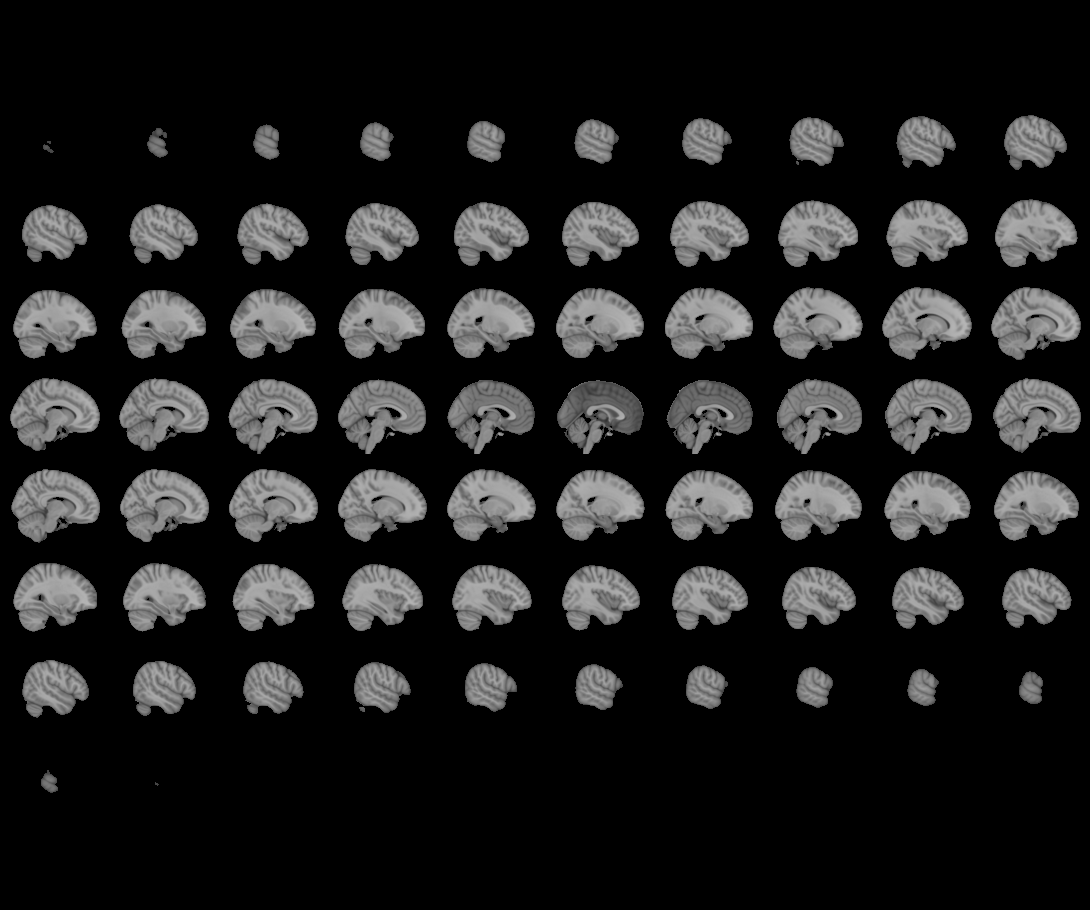
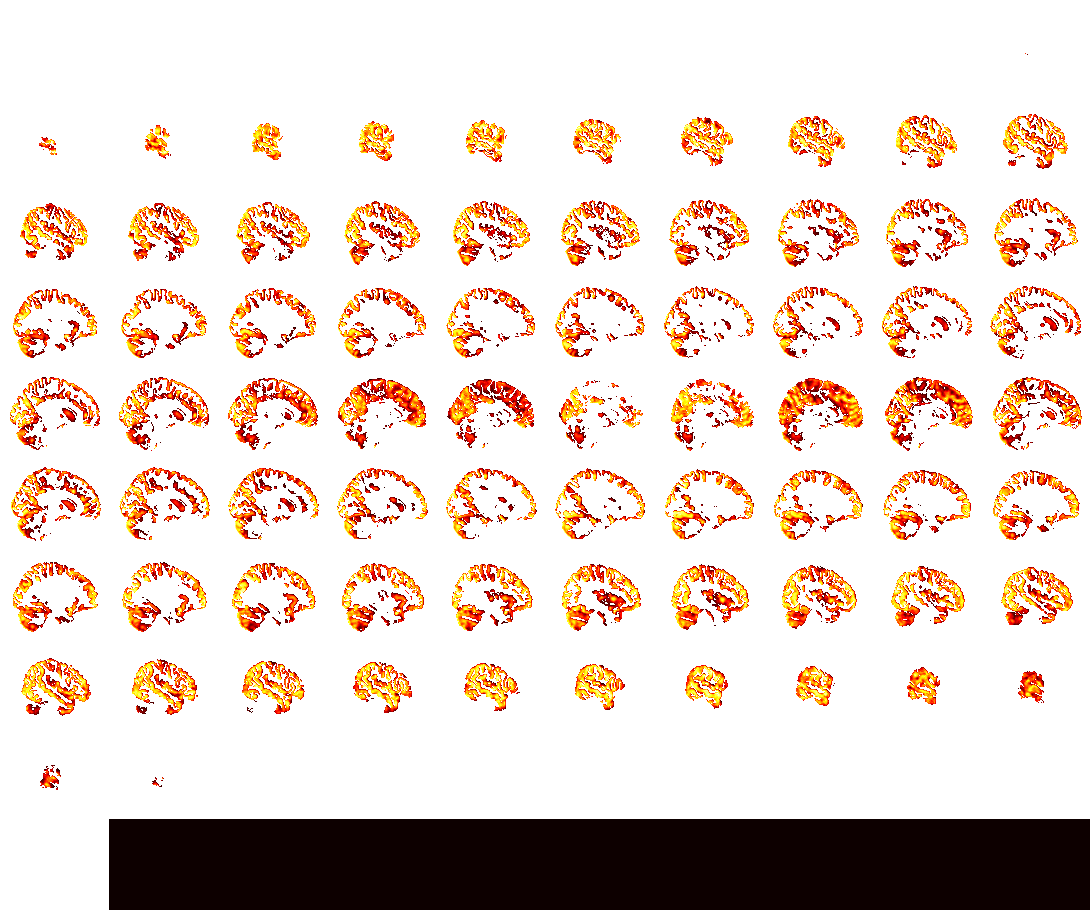

In [5]:
hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_training = mean_r2(hdf5_file['validation'], ref_img=mask_img)
plotting.view_img(r2_training, threshold=0.1, vmax=1)

sub-01
sub-02
sub-03
sub-04
sub-05
sub-06


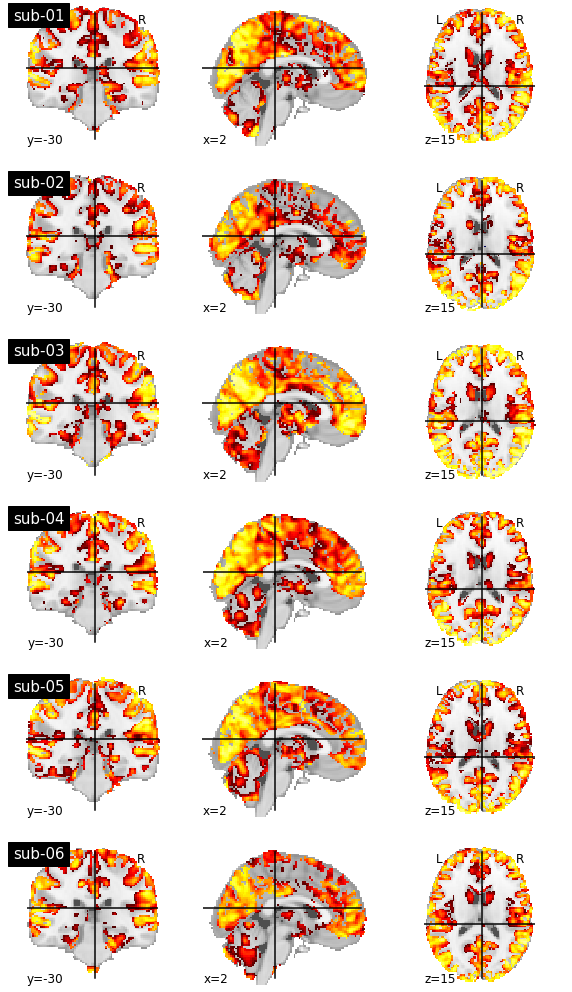

In [6]:
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
    r2_training = mean_r2(hdf5_file['validation'], ref_img=mask_img)
    plotting.plot_stat_map(r2_training, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, colorbar=False)

# Inter-subject

## interactive viewer


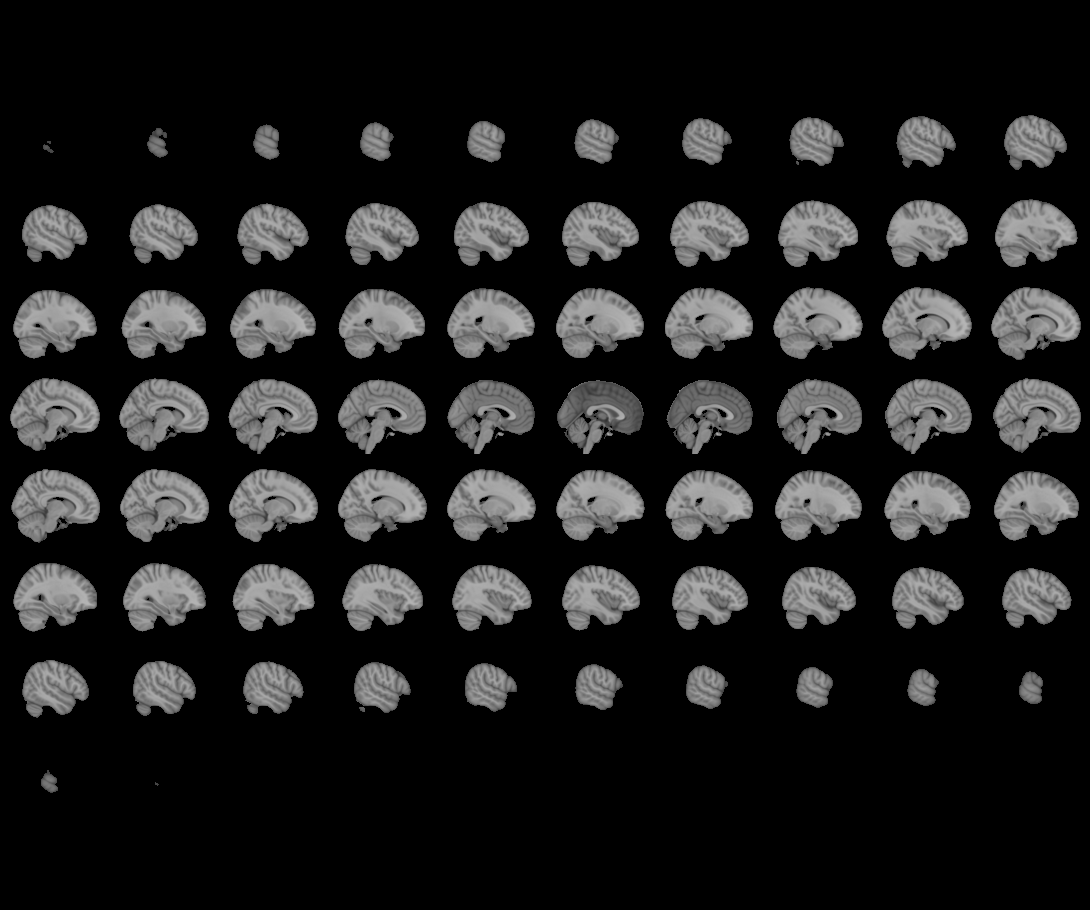
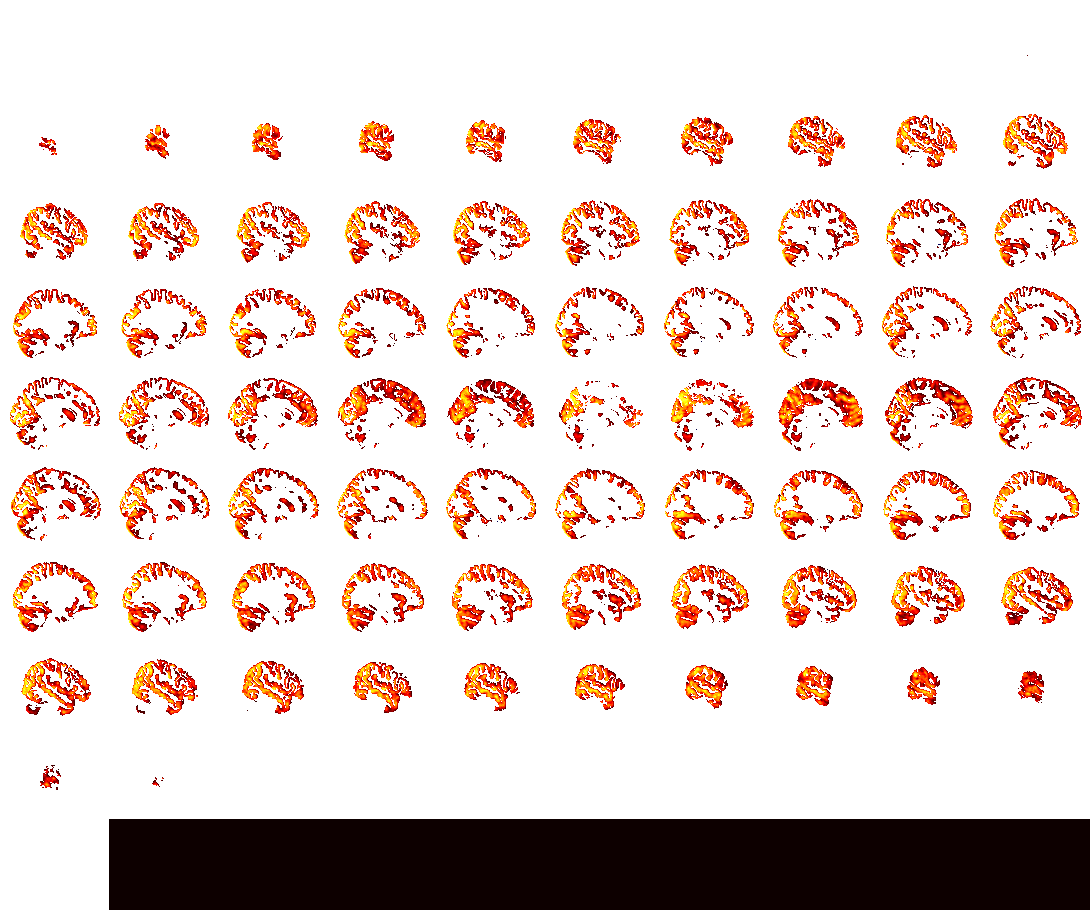

In [7]:
hdf5_file = load_r2_inter(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_inter = mean_inter_r2(hdf5_file['inter'], ref_img=mask_img)
plotting.view_img(r2_inter, threshold=0.1, vmax=1)

## static viewer (all subjects)

sub-01
sub-02
sub-03
sub-04
sub-05
sub-06


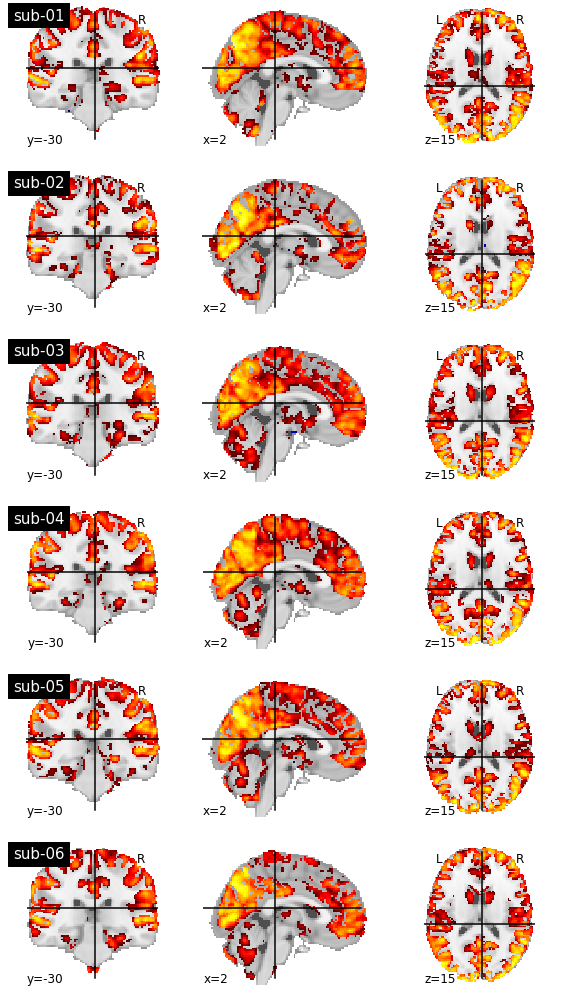

In [8]:
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_inter(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
    r2_inter = mean_inter_r2(hdf5_file['inter'], ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, colorbar=False)

# Group atlases

## Schaefer

sub-01
sub-02
sub-03
sub-04
sub-05
sub-06


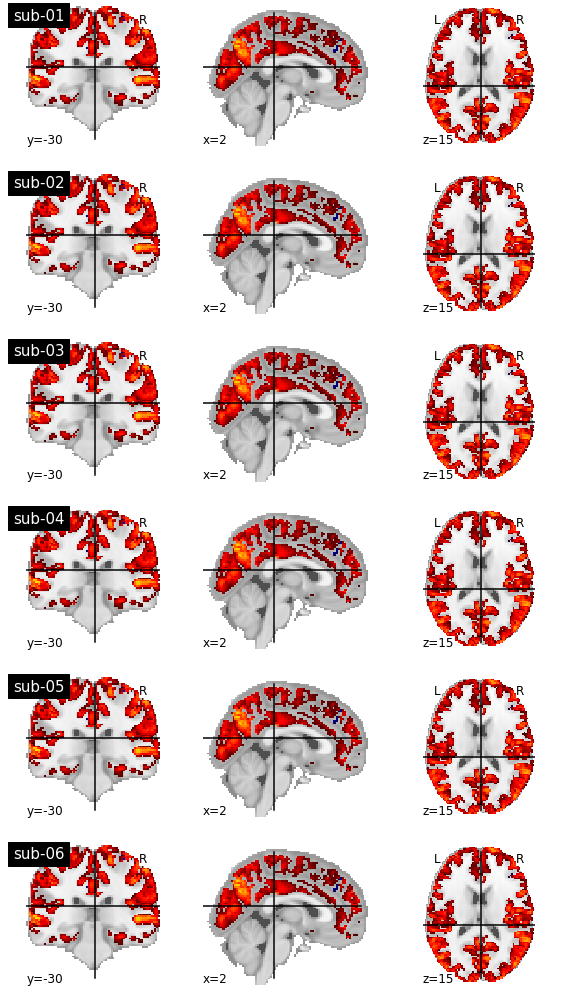

In [10]:
#list_atlas = ['mist197', 'mist444', 'schaefer', 'smith']
atlas = 'schaefer'
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_inter = mean_inter_r2(hdf5_file, ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, 
        colorbar=False)

## MIST444

sub-01
sub-02
sub-03
sub-04
sub-05
sub-06


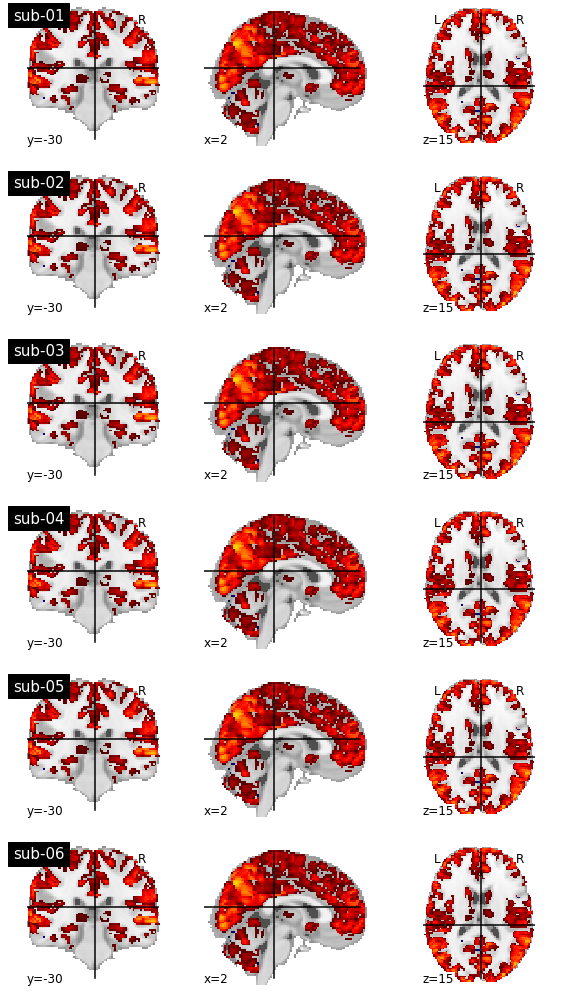

In [11]:
#list_atlas = ['mist197', 'mist444', 'schaefer', 'smith']
atlas = 'mist444'
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_inter = mean_inter_r2(hdf5_file, ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, 
        colorbar=False)

# MIST197

sub-01
sub-02
sub-03
sub-04
sub-05
sub-06


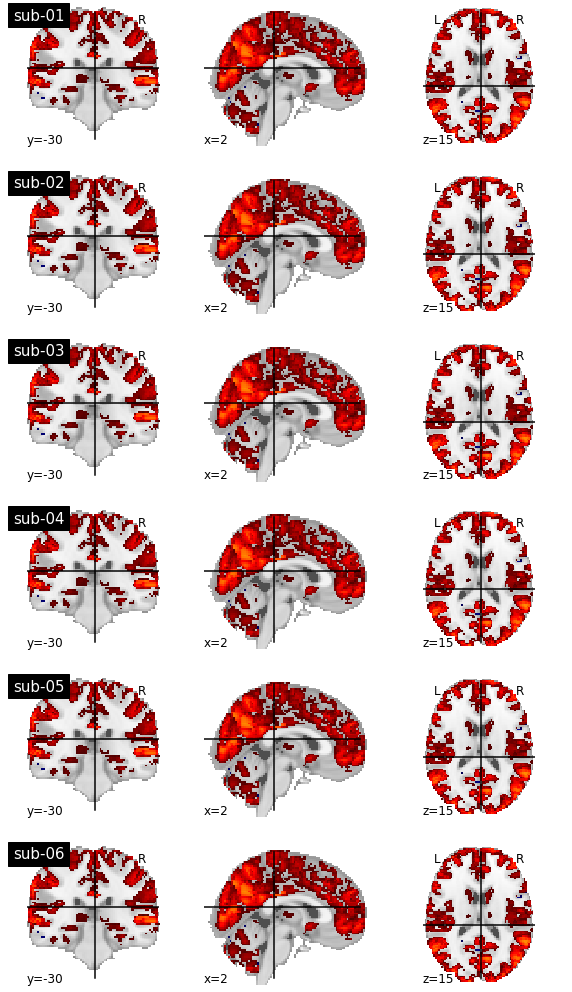

In [12]:
#list_atlas = ['mist197', 'mist444', 'schaefer', 'smith']
atlas = 'mist197'
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_inter = mean_inter_r2(hdf5_file, ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, 
        colorbar=False)

# Smith

sub-01
sub-02
sub-03
sub-04
sub-05
sub-06


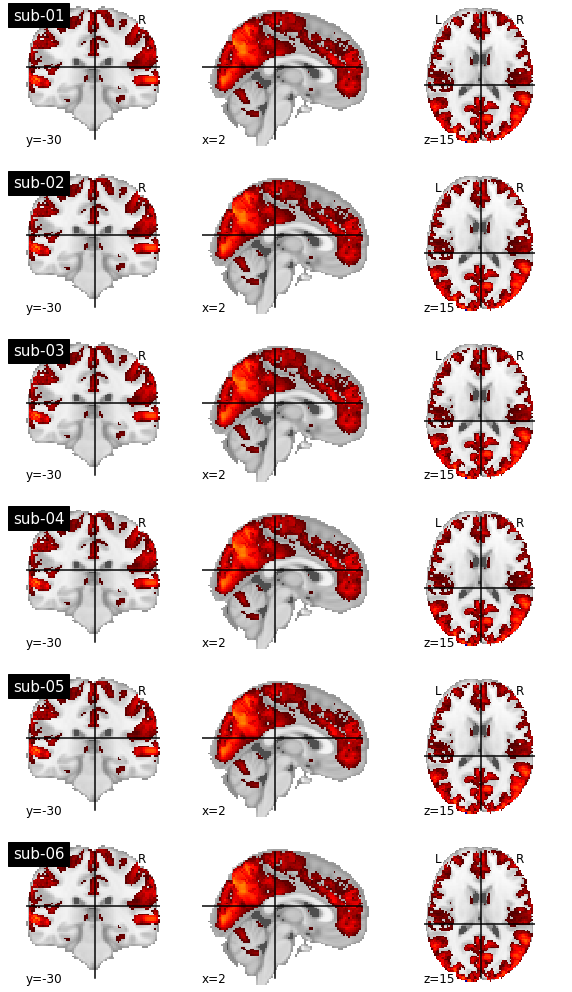

In [13]:
#list_atlas = ['mist197', 'mist444', 'schaefer', 'smith']
atlas = 'smith'
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_inter = mean_inter_r2(hdf5_file, ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, 
        colorbar=False)